In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [89]:
# Load the DataSet
data = pd.read_csv("StudentPerformanceFactors.csv")
data = pd.DataFrame(data)

In [90]:
exam_mean = data["Exam_Score"].mean()
data["Student_Tier"] = data["Exam_Score"].apply(lambda x: 'Below Average' if x < exam_mean else 'Above Average')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Student_Tier
0,23,84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,Below Average
1,19,64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,Below Average
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,Above Average
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,Above Average
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,...,Medium,Public,Positive,2,No,High School,Near,Female,68,Above Average
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,...,High,Public,Positive,2,No,High School,Near,Female,69,Above Average
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,...,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68,Above Average
6605,10,86,High,High,Yes,6,91,High,Yes,2,...,Medium,Private,Positive,3,No,High School,Far,Female,68,Above Average


In [91]:
# Shape of the dataset:
print(f"Number of rows: {data.shape[0]}, Number of columns: {data.shape[1]}")

Number of rows: 6607, Number of columns: 21


In [92]:
# Column names:
data.columns.tolist()

['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score',
 'Student_Tier']

In [93]:
data.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
Student_Tier                  object
dtype: object

In [94]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [95]:
 # Summary for categorical columns
data.describe(include=['object']) 

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Student_Tier
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male,Below Average
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814,3599


In [96]:
# Missing Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

# Data Cleaning

In [97]:
#Checking the unique value counts in columns
featureValues={}
for d in data.columns.tolist():
    count=data[d].nunique()
    if count==1:
        featureValues[d]=count
# List of columns having same 1 unique value        
cols_to_drop= list(featureValues.keys())
print("Columns having 1 unique value are :n",cols_to_drop)

Columns having 1 unique value are :n []


In [98]:
# Dropping Distance_from_home and Gender column
data.drop(["Distance_from_Home", "Gender"],inplace=True,axis=1)
data.columns


Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Exam_Score', 'Student_Tier'],
      dtype='object')

In [99]:
# Checking null percentage
data.isnull().mean()*100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Exam_Score                    0.000000
Student_Tier                  0.000000
dtype: float64

In [100]:
print(data["Teacher_Quality"].value_counts())
print(data["Parental_Education_Level"].value_counts())

Medium    3925
High      1947
Low        657
Name: Teacher_Quality, dtype: int64
High School     3223
College         1989
Postgraduate    1305
Name: Parental_Education_Level, dtype: int64


In [101]:
#fill missing value
data["Teacher_Quality"]= data["Teacher_Quality"].fillna("Medium")
data["Parental_Education_Level"]= data["Parental_Education_Level"].fillna("High School")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [102]:
for col in data.columns:
    if data[col].duplicated().any() == 'True' :
        print(f'Column {col} contain duplicates.')
    else:
        print(f'Column {col} does not contain duplicates')

Column Hours_Studied does not contain duplicates
Column Attendance does not contain duplicates
Column Parental_Involvement does not contain duplicates
Column Access_to_Resources does not contain duplicates
Column Extracurricular_Activities does not contain duplicates
Column Sleep_Hours does not contain duplicates
Column Previous_Scores does not contain duplicates
Column Motivation_Level does not contain duplicates
Column Internet_Access does not contain duplicates
Column Tutoring_Sessions does not contain duplicates
Column Family_Income does not contain duplicates
Column Teacher_Quality does not contain duplicates
Column School_Type does not contain duplicates
Column Peer_Influence does not contain duplicates
Column Physical_Activity does not contain duplicates
Column Learning_Disabilities does not contain duplicates
Column Parental_Education_Level does not contain duplicates
Column Exam_Score does not contain duplicates
Column Student_Tier does not contain duplicates


In [103]:
# Numerical Features
nums_data = data.select_dtypes(include=['int64', 'float64'])

print("\nNumerical Data:")
pd.DataFrame(nums_data)


Numerical Data:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


In [104]:
# Catergorical Features
category_data = data.select_dtypes(include=['object', 'category'])
print("\nCategorical Data:")
for col in category_data :
    print(f'{col} : {data[col].unique()}')


Categorical Data:
Parental_Involvement : ['Low' 'Medium' 'High']
Access_to_Resources : ['High' 'Medium' 'Low']
Extracurricular_Activities : ['No' 'Yes']
Motivation_Level : ['Low' 'Medium' 'High']
Internet_Access : ['Yes' 'No']
Family_Income : ['Low' 'Medium' 'High']
Teacher_Quality : ['Medium' 'High' 'Low']
School_Type : ['Public' 'Private']
Peer_Influence : ['Positive' 'Negative' 'Neutral']
Learning_Disabilities : ['No' 'Yes']
Parental_Education_Level : ['High School' 'College' 'Postgraduate']
Student_Tier : ['Below Average' 'Above Average']


# Exploratory Data Analysis

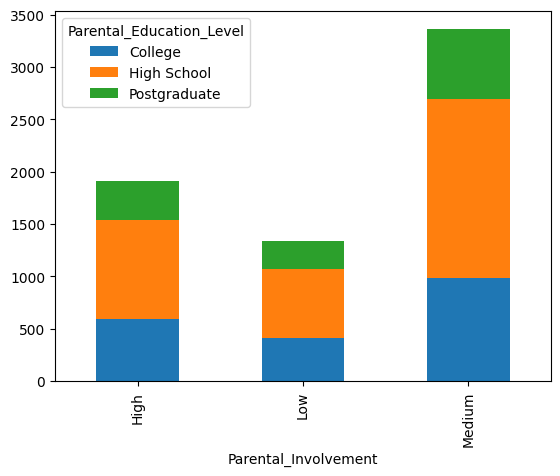

In [105]:
pd.crosstab(data["Parental_Involvement"], data["Parental_Education_Level"]).plot(kind="bar", stacked=True)
plt.show()

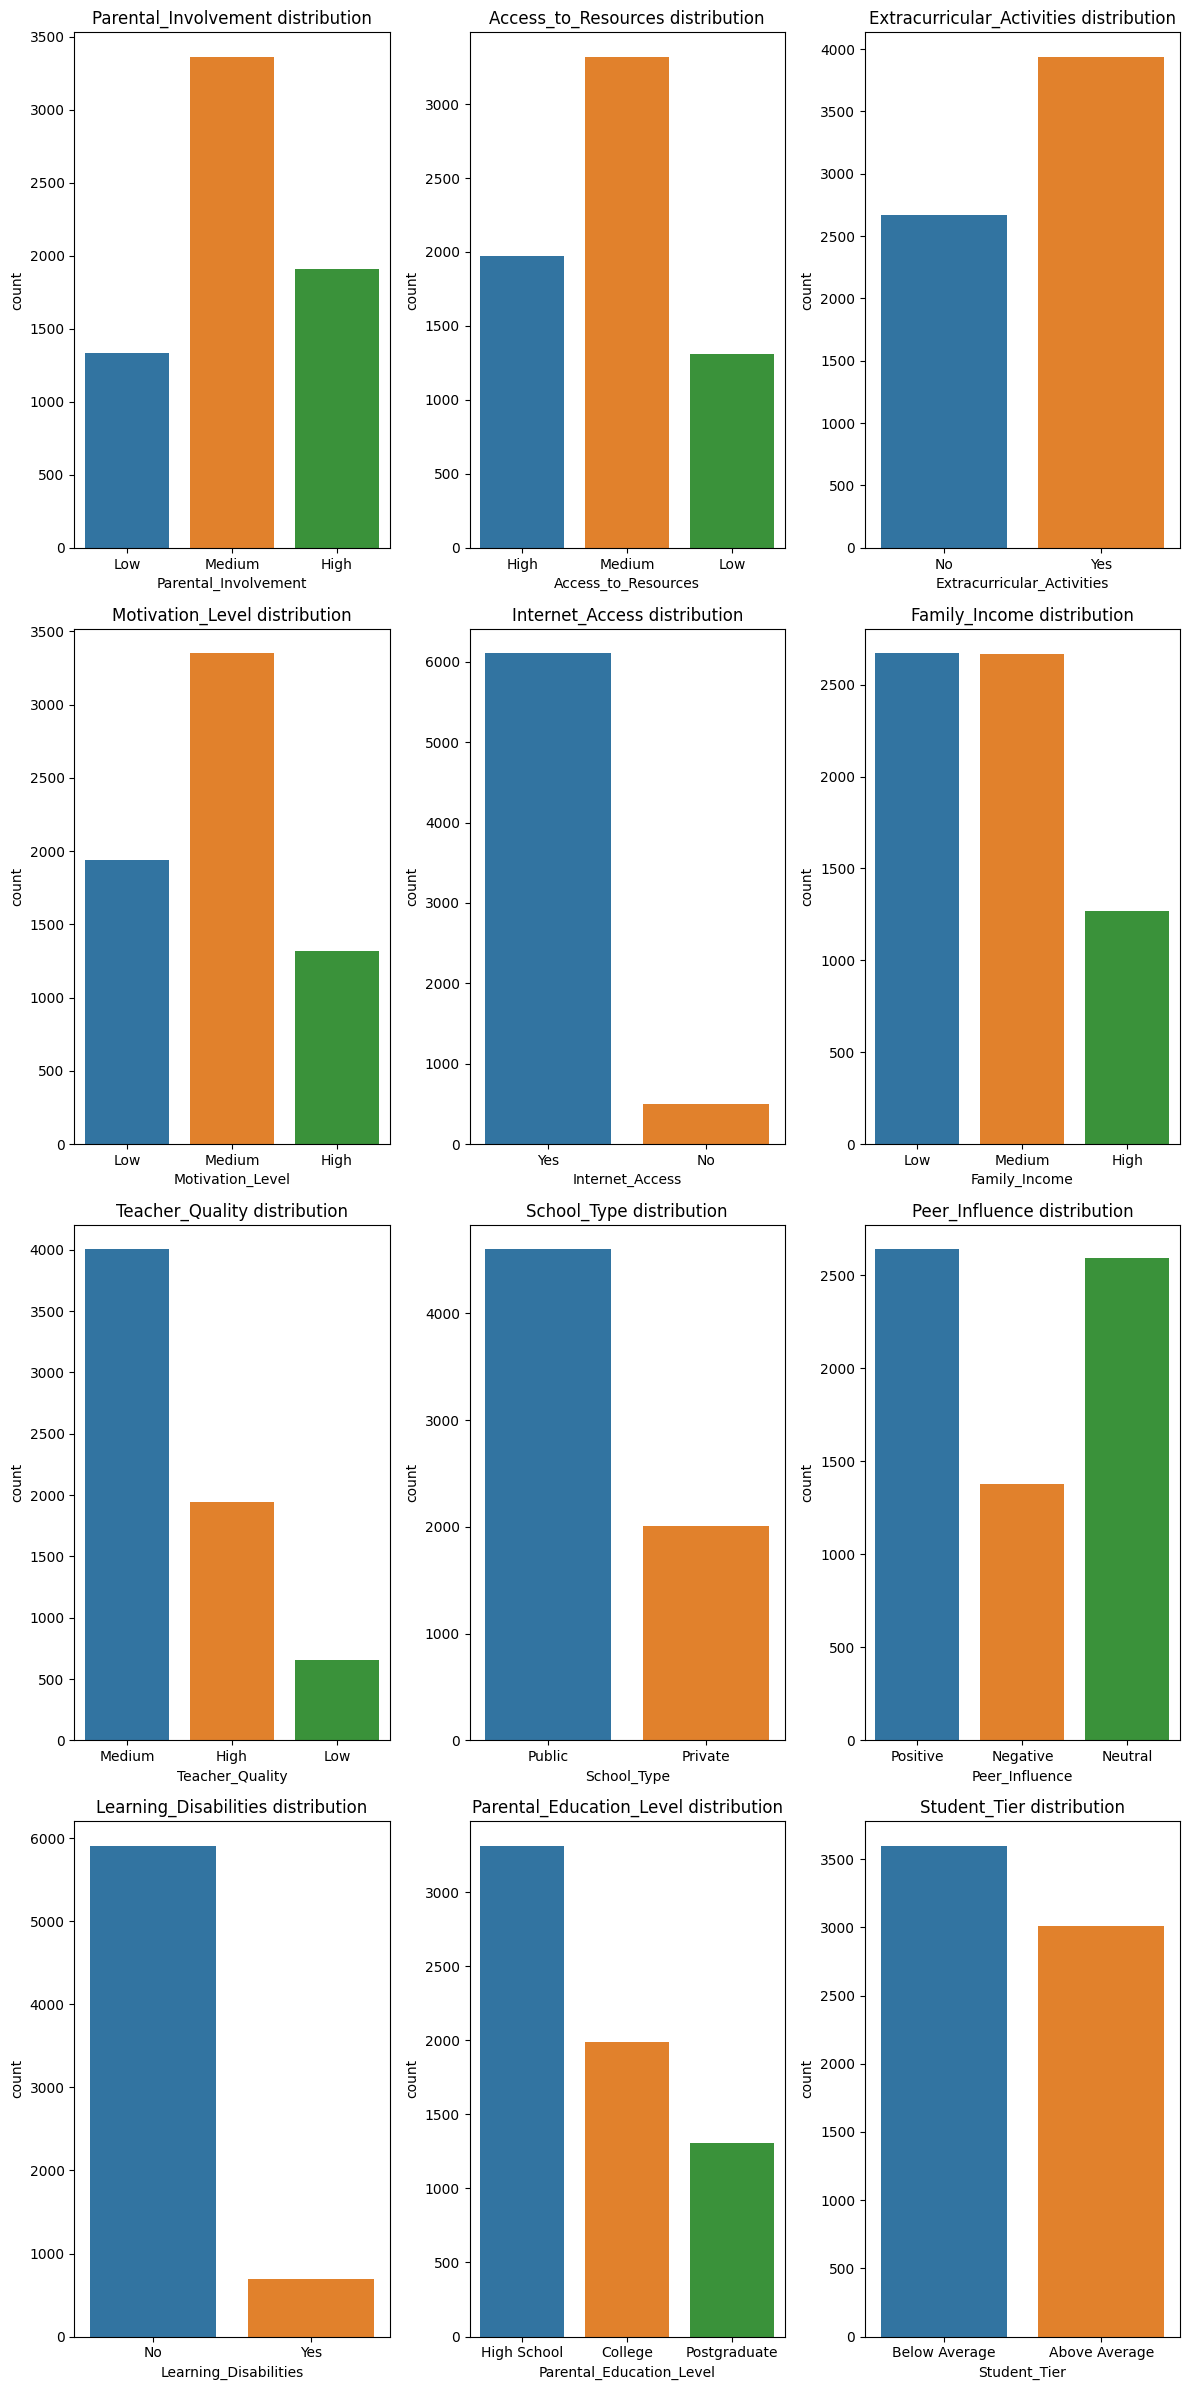

In [106]:
# Visualising Categorical Distribution

n_cols = 3  # Number of columns in the grid
n_rows = -(-len(category_data.columns) // n_cols)  # Calculate required rows (ceil division)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot each categorical column
for i, col in enumerate(category_data):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f"{col} distribution")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

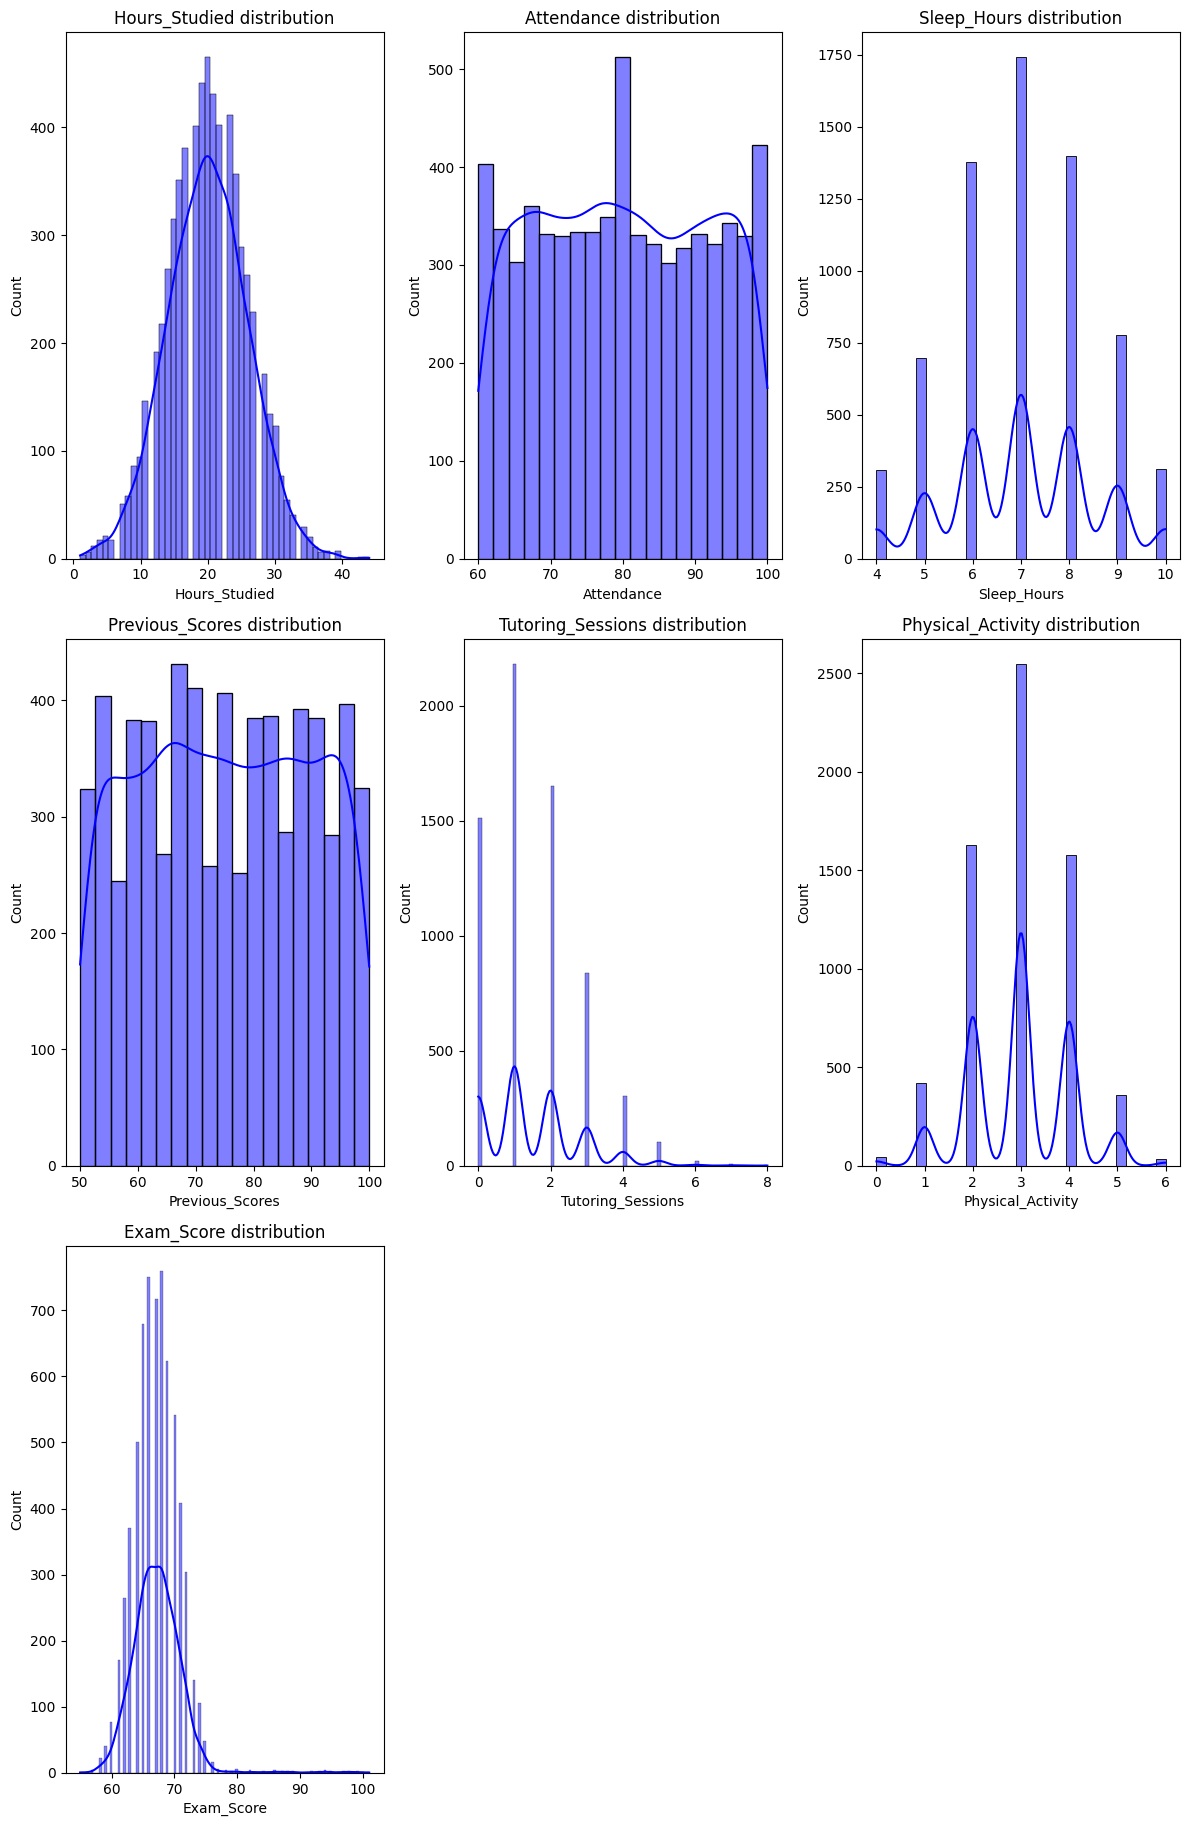

In [107]:
# Visualising Numerical Distribution

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(nums_data):
    sns.histplot(data=data, x=col, ax=axes[i], kde=True, color="b")
    axes[i].set_title(f"{col} distribution")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

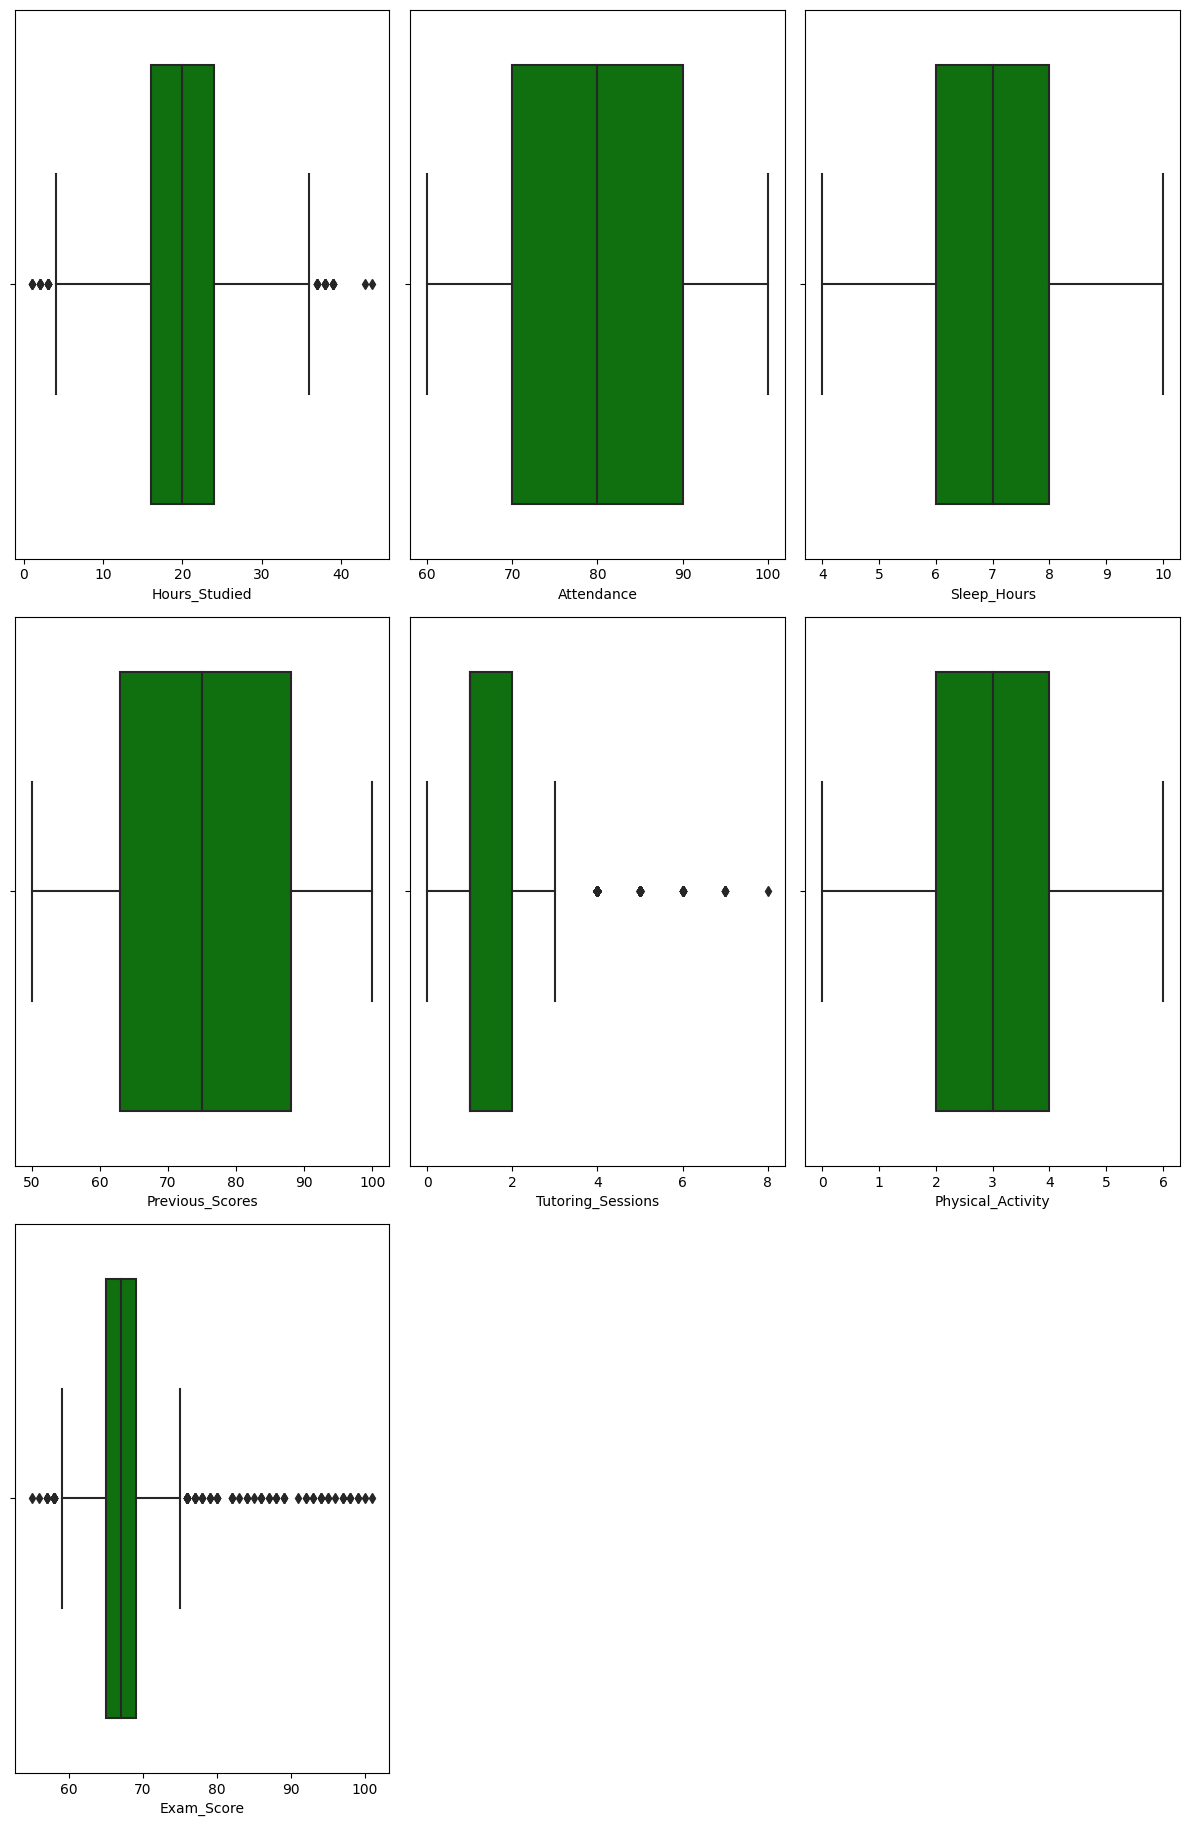

In [108]:
# Outliers in Numerical Features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(nums_data):
    sns.boxplot(x=data[col], ax=axes[i], color="green")
    
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\ipykerne

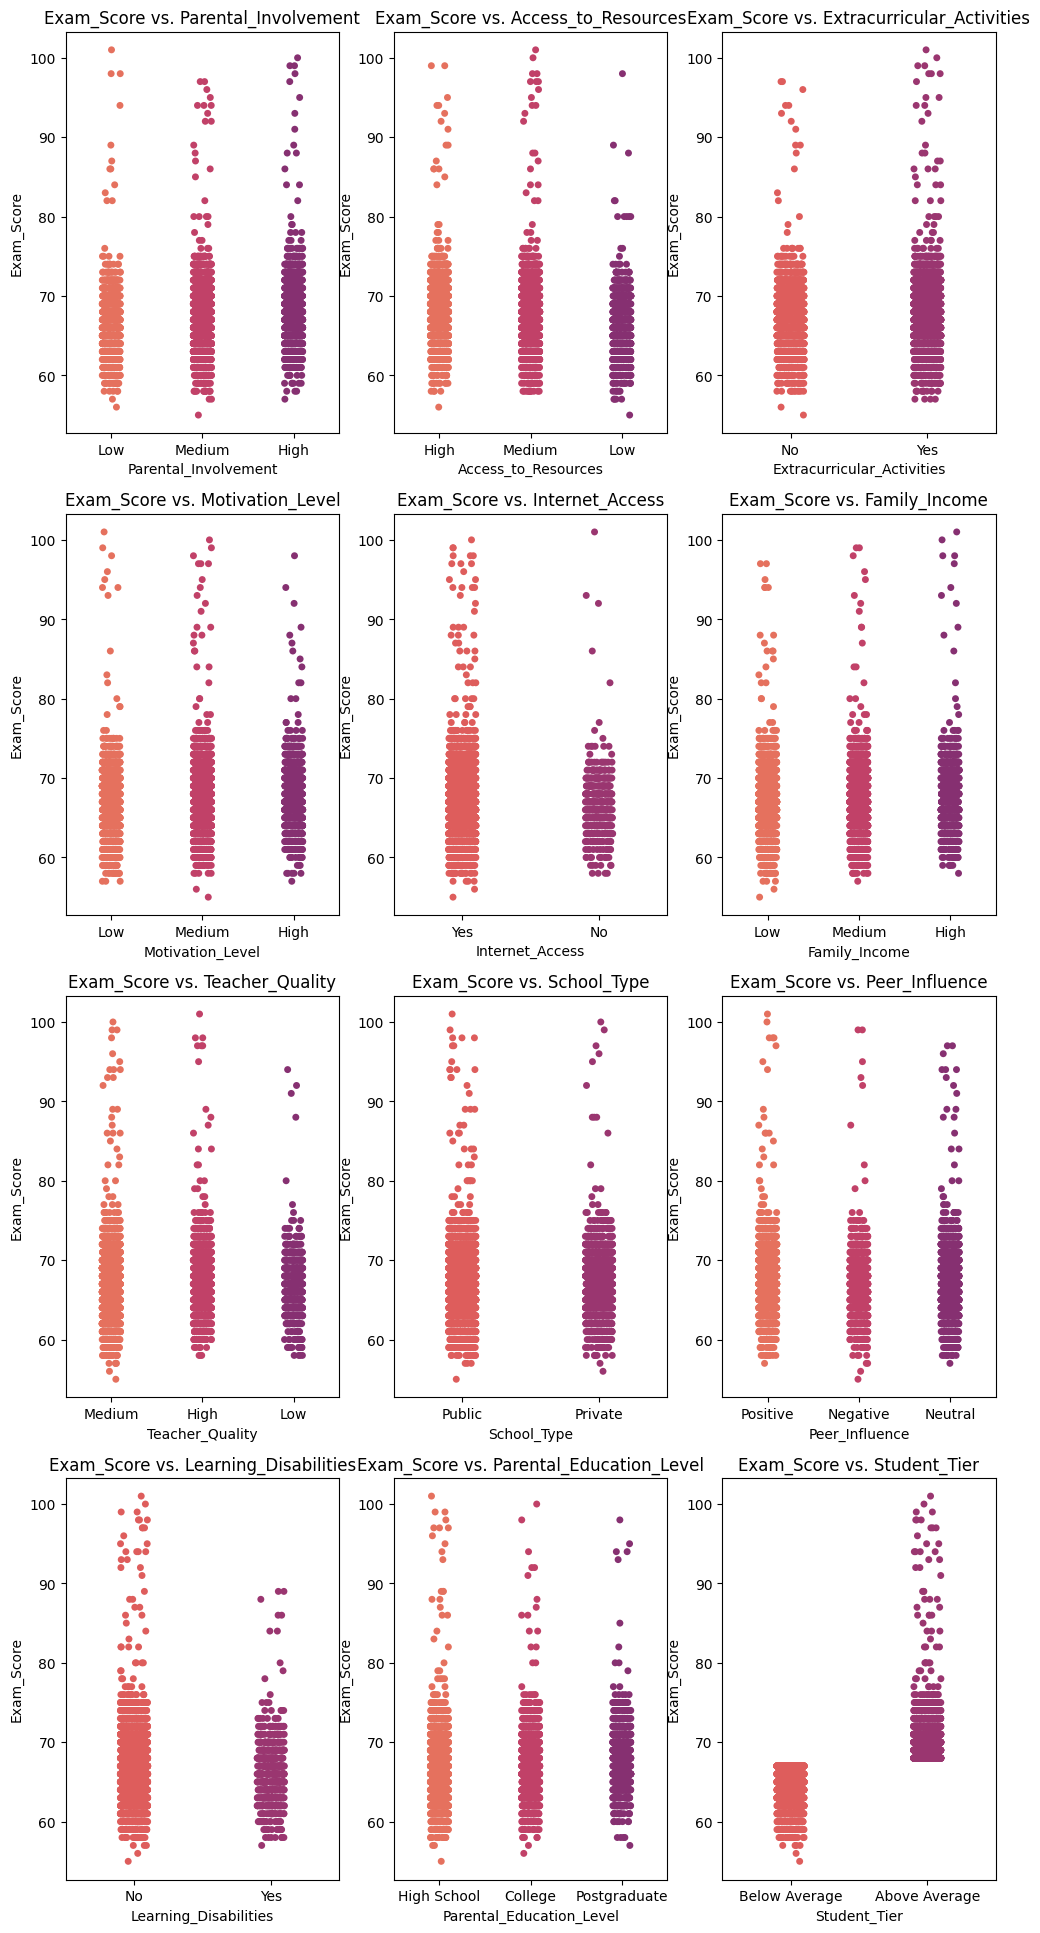

In [109]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten()
target_col = "Exam_Score"

for i, col in enumerate(category_data):
    sns.stripplot(data=data, x=col, y=target_col, ax=axes[i], palette='flare')
    axes[i].set_title(f"{target_col} vs. {col}")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
    
plt.show()

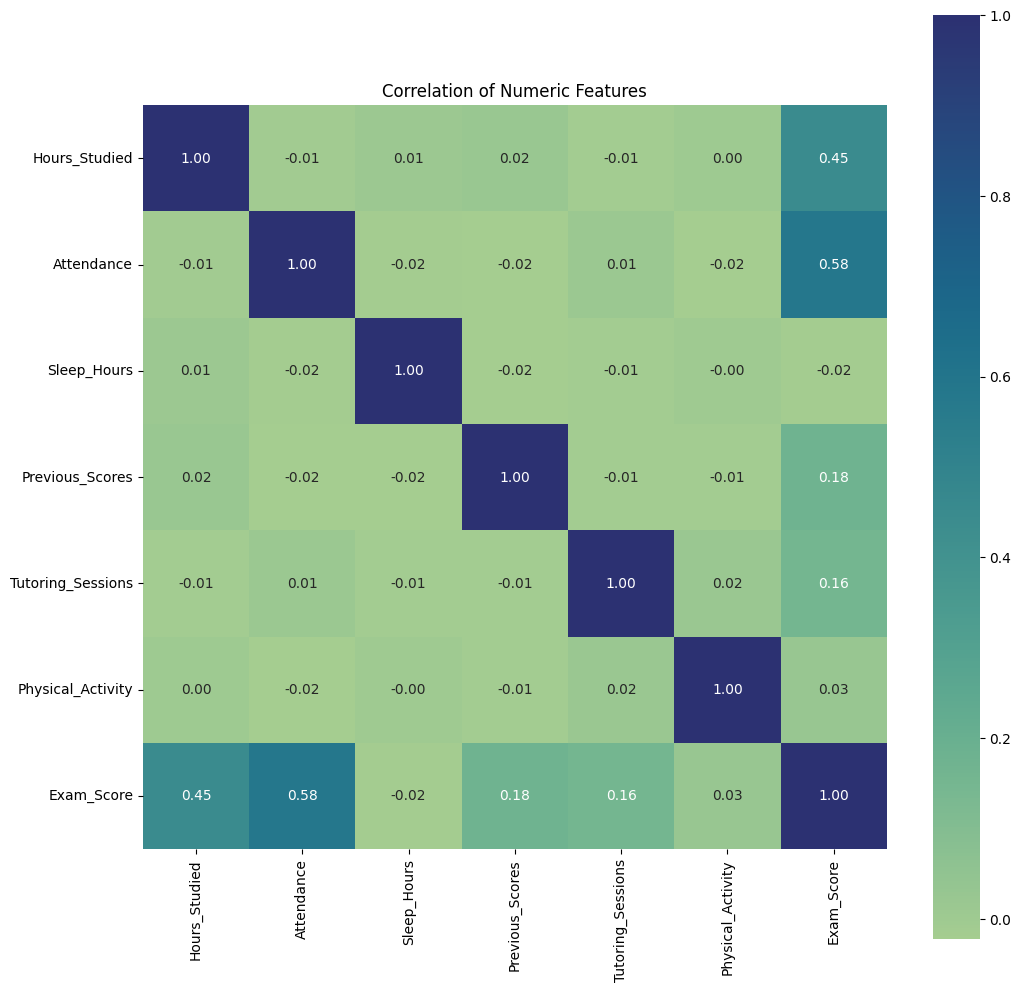

In [110]:
# Visualising correlation matrix for numerical features
plt.figure(figsize=(12, 12))
sns.heatmap(data=nums_data.corr(), cmap="crest", square=True, annot=True, cbar=True, fmt=".2f")
plt.title("Correlation of Numeric Features")

plt.show()

# Feature Engineering

In [111]:
category_data = category_data.drop("Student_Tier", axis=1)

In [112]:
# Encode categorical features using OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = encoder.fit_transform(data[category_data.columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(category_data.columns))

In [113]:
nums_data.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

In [114]:
# Encode StudentTier label
label_encoder = LabelEncoder()
data["Student_Tier"] = label_encoder.fit_transform(data["Student_Tier"])  # Below Average = 0, Above Average = 1

# Combine numeric and encoded categorical data
nums_data = data.select_dtypes(include='number').columns.tolist()
nums_data.remove("Student_Tier")  # Ensure target column isn't included in features
final_df = pd.concat([data[nums_data], encoded_categorical_df, data["Student_Tier"]], axis=1)
final_df

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Family_Income_Medium,Teacher_Quality_Low,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Student_Tier
0,23,84,7,73,0,3,67,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1
1,19,64,8,59,2,4,61,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,24,98,7,91,2,4,74,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0
3,29,89,8,98,1,4,71,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,19,92,6,65,3,4,70,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
6603,23,76,8,81,3,2,69,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
6604,20,90,6,65,3,2,68,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
6605,10,86,6,91,2,3,68,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0


# Train-Test Split

In [115]:
X = final_df.drop(["Student_Tier", "Exam_Score"], axis=1)
y = final_df["Student_Tier"]

In [116]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (4624, 24)
train size y :  (4624,)
test size X :  (1983, 24)
test size y :  (1983,)


# Normalization / Feature Scaling

In [117]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
#check for distribution of labels
y_train.value_counts(normalize=True)

1    0.544983
0    0.455017
Name: Student_Tier, dtype: float64

# Logistic Regression - Build the Model

In [180]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=800, C= 0.1, penalty= 'l2', solver='newton-cg')
model.fit(X_train, y_train)

# Predict and evaluate
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

Training Accuracy: 0.9578287197231834
Test Accuracy: 0.9641956631366616


In [164]:
import numpy as np

# Check the distribution of classes
unique, counts = np.unique(y_train, return_counts=True)
print(f"Class distribution in training set: {dict(zip(unique, counts))}")


Class distribution in training set: {0: 2104, 1: 2520}


In [165]:
from sklearn.model_selection import cross_val_score

# Use cross-validation to evaluate the model's performance
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [0.93948563 0.94856278 0.95382286 0.95306586 0.96214989]
Average cross-validation score: 0.9514174037227103


# Model Evaluation Metrics

In [166]:
cm = confusion_matrix(y_test, y_test_pred)
print(f'Confusion Matrix:\n{cm}')

Confusion Matrix:
[[ 869   35]
 [  36 1043]]


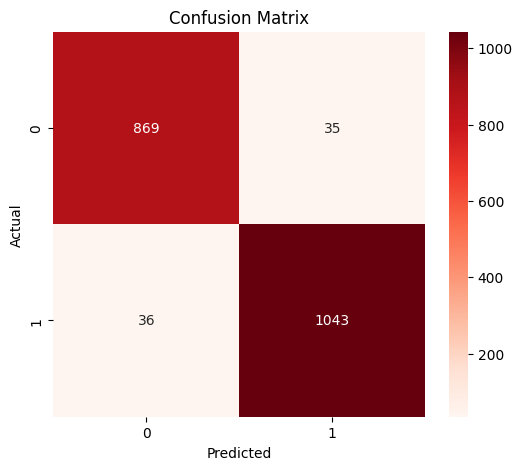

In [167]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [168]:
report = classification_report(y_test, y_test_pred)
print(f'Classification Report:\n{report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       904
           1       0.97      0.97      0.97      1079

    accuracy                           0.96      1983
   macro avg       0.96      0.96      0.96      1983
weighted avg       0.96      0.96      0.96      1983



In [169]:
y_pred_prob_test = model.predict_proba(X_test)[:, 1]
print("ROC-AUC score  test dataset:  \t", roc_auc_score(y_test,y_pred_prob_test))

ROC-AUC score  test dataset:  	 0.9916845735563082


# Tuning Hyperparameters

In [170]:
#Hyperparameter tuning
# define model/create instance
lr=LogisticRegression()
#specifying all hyperparameters with possible values
param_grid = {
    'C': [0.1, 0.5, 1, 10, 15],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet','none'],  # Type of regularization
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg'],  # Optimization algorithm
    'max_iter': [100, 500, 1000, 2000]
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=4, scoring="f1", return_train_score=True)
grid_search.fit(X_train, y_train)

c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
c:\Users\akash\anaconda3\envs\ml-venv\lib\site-packages\sklearn\linear_model\_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
c:\Users\akash\anaconda3\env

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10, 15],
                         'max_iter': [100, 500, 1000, 2000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']},
             return_train_score=True, scoring='f1')

In [172]:
print(f"Best parameters found: {grid_search.best_params_}")

Best parameters found: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


# Model Evaluation

In [173]:
best_model = grid_search.best_estimator_
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

In [176]:
print(f"Accuracy of the best model: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of the best model: 0.9657085224407463
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       904
           1       0.97      0.97      0.97      1079

    accuracy                           0.97      1983
   macro avg       0.97      0.97      0.97      1983
weighted avg       0.97      0.97      0.97      1983



In [177]:
y_pred_prob_test = best_model.predict_proba(X_test)[:, 1]
print("ROC-AUC score  test dataset:  \t", roc_auc_score(y_test,y_pred_prob_test))

ROC-AUC score  test dataset:  	 0.9918342532827019
